#### Reference: Mario Dobler and Tim Gromann (2019): “Data Visualization with Python: Create an impact with meaningful data insights using interactive and engaging visuals”, Packt Publishing

## Example 06: Animal statistics

In this activity, we will use a scatter plot to show correlation within a dataset. Let’s look at the following scenario: You are given a dataset containing information about various animals. Visualize correlation between animal attributes.

In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [45]:
# Load dataset
data = pd.read_csv('./data/anage_data.csv')

In [46]:
data

,Unnamed: 0,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,...,Growth rate (1/days),Maximum longevity (yrs),Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
0,0,3,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,...,NaN,0.19,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
1,1,5,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,...,NaN,0.30,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN
2,2,6,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,...,NaN,8.00,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
3,3,8,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Cardiocondyla,obscurior,Cardiocondyla obscurior,...,NaN,0.50,captivity,medium,acceptable,NaN,NaN,NaN,NaN,NaN
4,4,9,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,...,NaN,28.00,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,4214,4239,Animalia,Porifera,Hexactinellida,Lyssacinosida,Rossellidae,Scolymastra,joubini,Hexactinellid sponge,...,NaN,15000.00,wild,medium,questionable,NaN,NaN,NaN,NaN,NaN
4214,4215,4241,Plantae,Pinophyta,Pinopsida,Pinales,Pinaceae,Pinus,longaeva,Great Basin bristlecone pine,...,NaN,5062.00,wild,medium,acceptable,NaN,999.00,NaN,NaN,NaN
4215,4216,4242,Fungi,Ascomycota,Saccharomycetes,Saccharomycetales,Saccharomycetaceae,Saccharomyces,cerevisiae,Baker's yeast,...,NaN,0.04,captivity,large,acceptable,NaN,NaN,NaN,NaN,NaN
4216,4217,4243,Fungi,Ascomycota,Schizosaccharomycetes,Schizosaccharomycetales,Schizosaccharomycetaceae,Schizosaccharomyces,pombe,Fission yeast,...,NaN,NaN,unknown,small,low,NaN,NaN,NaN,NaN,NaN


The given dataset is not complete. Filter the data so you end up with samples containing a body mass and a maximum longevity. Sort the data according to the animal class.

In [47]:
# Preprocessing
longevity = 'Maximum longevity (yrs)'
mass = 'Body mass (g)'
data = data[np.isfinite(data[longevity]) & np.isfinite(data[mass])]
data

,Unnamed: 0,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,...,Growth rate (1/days),Maximum longevity (yrs),Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
11,11,18,Animalia,Chordata,Amphibia,Anura,Bufonidae,Anaxyrus,americanus,American toad,...,NaN,36.0,captivity,medium,acceptable,NaN,NaN,0.00829,21.60,288.00
19,19,26,Animalia,Chordata,Amphibia,Anura,Bufonidae,Anaxyrus,terrestris,Southern toad,...,NaN,10.0,captivity,medium,acceptable,NaN,NaN,0.00698,19.20,288.00
29,29,36,Animalia,Chordata,Amphibia,Anura,Bufonidae,Rhinella,marina,Cane toad,...,NaN,24.8,captivity,large,acceptable,NaN,NaN,0.03030,105.00,293.00
53,53,60,Animalia,Chordata,Amphibia,Anura,Hylidae,Hyla,versicolor,Gray treefrog,...,NaN,7.8,captivity,medium,acceptable,NaN,NaN,0.00433,6.97,290.50
78,78,85,Animalia,Chordata,Amphibia,Anura,Pipidae,Xenopus,laevis,African clawed frog,...,NaN,30.3,captivity,large,acceptable,NaN,NaN,0.01200,63.60,288.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,3176,3194,Animalia,Chordata,Reptilia,Squamata,Scincidae,Eumeces,obsoletus,Great Plains skink,...,NaN,7.3,captivity,small,acceptable,NaN,NaN,0.02060,30.00,300.50
3181,3182,3200,Animalia,Chordata,Reptilia,Squamata,Scincidae,Tiliqua,scincoides,Australian blue-tongued lizard,...,NaN,26.6,captivity,large,acceptable,NaN,NaN,0.21270,493.00,303.00
3187,3188,3206,Animalia,Chordata,Reptilia,Squamata,Teiidae,Cnemidophorus,tigris,Western whiptail,...,NaN,7.8,wild,medium,acceptable,NaN,NaN,0.01700,18.00,304.25
3302,3303,3322,Animalia,Chordata,Reptilia,Testudines,Emydidae,Chrysemys,picta,Painted turtle,...,NaN,61.0,wild,medium,acceptable,NaN,NaN,0.02360,400.00,289.50


In [5]:
# Sort according to class
amphibia = data[data['Class'] == 'Amphibia']
aves = data[data['Class'] == 'Aves']
mammalia = data[data['Class'] == 'Mammalia']
reptilia = data[data['Class'] == 'Reptilia']

In [6]:
reptilia

,Unnamed: 0,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,...,Growth rate (1/days),Maximum longevity (yrs),Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
2859,2859,2877,Animalia,Chordata,Reptilia,Crocodilia,Alligatoridae,Alligator,mississippiensis,American alligator,...,NaN,77.0,captivity,large,high,NaN,NaN,0.15390,1079.0,295.31
2880,2880,2898,Animalia,Chordata,Reptilia,Rhynchocephalia,Sphenodontidae,Sphenodon,punctatus,Tuatara,...,NaN,90.0,captivity,medium,acceptable,NaN,NaN,0.06050,430.0,295.50
2904,2904,2922,Animalia,Chordata,Reptilia,Squamata,Anguidae,Elgaria,multicarinata,Southern alligator lizard,...,NaN,9.8,captivity,small,acceptable,NaN,NaN,0.01320,31.5,295.50
2909,2909,2927,Animalia,Chordata,Reptilia,Squamata,Boidae,Boa,constrictor,Boa constrictor,...,NaN,40.4,captivity,large,acceptable,NaN,NaN,0.35890,3532.0,293.00
2988,2988,3006,Animalia,Chordata,Reptilia,Squamata,Colubridae,Natrix,natrix,Grass snake,...,NaN,20.0,captivity,medium,acceptable,NaN,NaN,0.02950,94.2,290.25
3122,3123,3141,Animalia,Chordata,Reptilia,Squamata,Iguanidae,Dipsosaurus,dorsalis,Desert iguana,...,NaN,14.6,captivity,medium,acceptable,NaN,NaN,0.04410,69.5,305.50
3133,3134,3152,Animalia,Chordata,Reptilia,Squamata,Lacertidae,Lacerta,viridis,European green lizard,...,NaN,10.0,unknown,medium,acceptable,NaN,NaN,0.00337,15.7,293.83
3157,3158,3176,Animalia,Chordata,Reptilia,Squamata,Pythonidae,Python,molurus,Indian python,...,NaN,34.2,captivity,large,acceptable,NaN,NaN,1.26610,12370.0,303.00
3159,3160,3178,Animalia,Chordata,Reptilia,Squamata,Pythonidae,Python,reticulatus,Reticulated python,...,NaN,29.4,captivity,medium,acceptable,NaN,NaN,2.73490,32000.0,297.50
3175,3176,3194,Animalia,Chordata,Reptilia,Squamata,Scincidae,Eumeces,obsoletus,Great Plains skink,...,NaN,7.3,captivity,small,acceptable,NaN,NaN,0.02060,30.0,300.50


Create a scatter plot visualizing the correlation between the body mass and the maximum longevity. Use different colors for grouping data samples according to their class. Add a legend, labels and a title. Use a log scale for both the x-axis and y-axis.

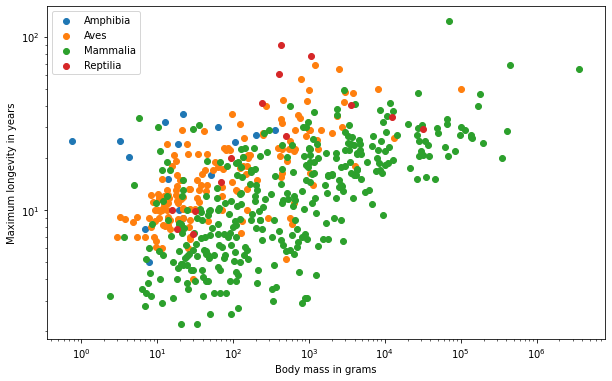

In [48]:
# Create figure
plt.figure(figsize=(10, 6), dpi=72)
# Create scatter plot
plt.scatter(amphibia[mass], amphibia[longevity], label='Amphibia')
plt.scatter(aves[mass], aves[longevity], label='Aves')
plt.scatter(mammalia[mass], mammalia[longevity], label='Mammalia')
plt.scatter(reptilia[mass], reptilia[longevity], label='Reptilia')
# Add legend
plt.legend()
# Log scale
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
# Add labels
plt.xlabel('Body mass in grams')
plt.ylabel('Maximum longevity in years')
# Show plot
plt.show()